In [239]:
import numpy as np
import pandas as pd
from sklearn.tree import  DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [240]:
# Veri seti oluşturma
np.random.seed(42)
n_houses = 300

# Özellikler: Ev özellikleri
ev_data = {
    'metrekare': np.random.uniform(50, 300, n_houses),
    'oda_sayisi': np.random.randint(1, 6, n_houses),
    'banyo_sayisi': np.random.randint(1, 4, n_houses),
    'bina_yasi': np.random.randint(0, 50, n_houses),
    'merkeze_uzaklik_km': np.random.uniform(0, 30, n_houses),
    'otopark': np.random.randint(0, 3, n_houses)
}

In [241]:
df_ev = pd.DataFrame(ev_data)

In [242]:
# Hedef değişken: Fiyat (TL)
# Fiyat = temel fiyat + metrekareye göre + diğer özellikler - yaş ve uzaklık etkisi
df_ev['fiyat'] = (
    200000 +  # Temel fiyat
    df_ev['metrekare'] * 2000 +  # Metrekare başı
    df_ev['oda_sayisi'] * 50000 +  # Oda başı
    df_ev['banyo_sayisi'] * 30000 +  # Banyo başı
    df_ev['otopark'] * 40000 -  # Otopark başı
    df_ev['bina_yasi'] * 2000 -  # Yaş azaltan faktör
    df_ev['merkeze_uzaklik_km'] * 3000 +  # Uzaklık azaltan faktör
    np.random.normal(0, 50000, n_houses)  # Rastgele gürültü
)

In [243]:
df_ev.head()

,metrekare,oda_sayisi,banyo_sayisi,bina_yasi,merkeze_uzaklik_km,otopark,fiyat
0,143.635030,5,1,14,27.318720,2,724361.791814
1,287.678577,4,1,23,18.742838,1,933311.146357
2,232.998485,3,1,37,10.075976,2,818188.980792
3,199.664621,4,2,34,24.753220,1,755208.470445
4,89.004660,5,1,29,10.891776,1,643715.468306


In [244]:
print(f"\nFiyat İstatistikleri:")
print(df_ev['fiyat'].describe())


Fiyat İstatistikleri:
count    3.000000e+02
mean     7.088642e+05
std      1.774443e+05
min      2.996141e+05
25%      5.794700e+05
50%      7.187426e+05
75%      8.427177e+05
max      1.093479e+06
Name: fiyat, dtype: float64


In [245]:
# Veriyi ayırma
X_reg = df_ev.drop('fiyat', axis=1)
y_reg = df_ev['fiyat']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, 
    y_reg, 
    test_size=0.2, 
    random_state=42
)

In [246]:
dt_regressor = DecisionTreeRegressor(
    max_depth=5,      
    min_samples_leaf=10, #Yapraklarda daha fazla örnek
    min_impurity_decrease=1000, 
    random_state=42
)

dt_regressor.fit(X_train_reg, y_train_reg)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,1000
,ccp_alpha,0.0


In [247]:
# Tahminler
y_pred_reg = dt_regressor.predict(X_test_reg)

In [248]:
# Model Değerlendirme
print("\nModel Performansı:")
print(f"Eğitim R² Skoru: {dt_regressor.score(X_train_reg, y_train_reg):.4f}")
print(f"Test R² Skoru: {dt_regressor.score(X_test_reg, y_test_reg):.4f}")


Model Performansı:
Eğitim R² Skoru: 0.8691
Test R² Skoru: 0.6822


In [249]:
# Özellik Önemleri
print("\nÖzellik Önemleri:")
feature_importance_reg = pd.DataFrame({
    'Özellik': X_reg.columns,
    'Önem': dt_regressor.feature_importances_
}).sort_values('Önem', ascending=False)
print(feature_importance_reg)


Özellik Önemleri:
              Özellik      Önem
0           metrekare  0.802549
1          oda_sayisi  0.163135
3           bina_yasi  0.018822
5             otopark  0.009103
4  merkeze_uzaklik_km  0.006390
2        banyo_sayisi  0.000000


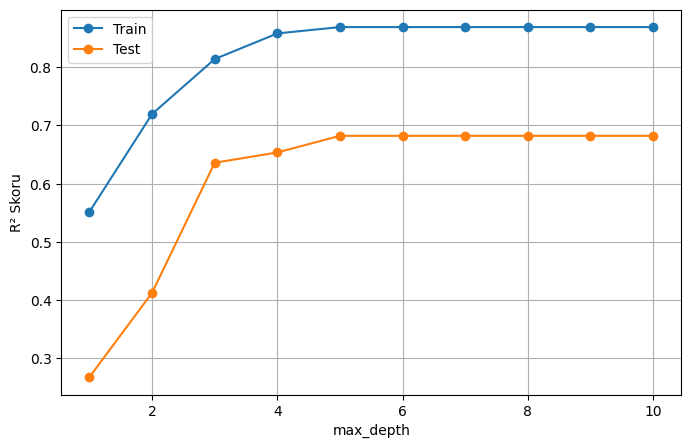

In [250]:
depths = range(1, 11) # max_depth değerlerini 1'den 10'a kadar denemek için aralık oluşturuyoruz
train_scores = []
test_scores = []

# Her bir depth değeri için model eğitimi ve skor hesaplama
for d in depths:
    model = DecisionTreeRegressor(
        max_depth=d,
        min_samples_leaf=10,
        random_state=42
    )
    model.fit(X_train_reg, y_train_reg)
    train_scores.append(model.score(X_train_reg, y_train_reg))
    test_scores.append(model.score(X_test_reg, y_test_reg))

# Skorları görselleştirme
plt.figure(figsize=(8,5))
plt.plot(depths, train_scores, marker='o', label='Train')
plt.plot(depths, test_scores, marker='o', label='Test')
plt.xlabel('max_depth')
plt.ylabel('R² Skoru')
plt.legend()
plt.grid(True)
plt.show()
